
The dataset "Mymensingh.csv" contains the historical climate record of Mymensingh, a location known for its diverse weather patterns. This Assignment presents a comprehensive analysis of the climate data with a focus on key variables, such as Temperature (TEM), Dew point temperature (DPT), wind speed (WIS), Humidity (HUM), Sea level pressure (SLP), and Total Rainfall (T_RAN). The main objectives of this analysis are to identify missing values, assess data normality, remove outliers, explore relationships between variables, perform principal component analysis, and develop a regression model to predict total rainfall. The findings and insights obtained from this analysis will aid in better understanding the climate trends in Mymensingh.

In [43]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# importing possibly necessary libraries
from scipy.stats import probplot, chi2

In [45]:
# loading the data set
Mymensingh_data=pd.read_csv('G:\\ASDS\\New folder\\Multivariant_habibur\\assssss\\Mymensingh.csv')

In [46]:
data=Mymensingh_data
# study the data
display(data.head()), data.info(), data.describe()

,ID,Station,Year,Month,TEM,DPT,WIS,HUM,SLP,T_RAN,A_RAIN,RAN
0,1,Mymensingh,1960,1,16.9,11.3,2.0,73.39,1016.0,15,0.48,NRT
1,2,Mymensingh,1960,2,21.4,12.6,1.7,66.34,1013.0,0,0.00,NRT
2,3,Mymensingh,1960,3,24.1,14.9,2.3,64.13,1011.4,69,2.23,LTR
3,4,Mymensingh,1960,4,29.9,17.6,2.2,59.03,1007.1,27,0.90,NRT
4,5,Mymensingh,1960,5,29.6,23.2,2.4,73.45,1003.4,187,6.03,LTR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       672 non-null    int64  
 1   Station  672 non-null    object 
 2   Year     672 non-null    int64  
 3   Month    672 non-null    int64  
 4   TEM      654 non-null    float64
 5   DPT      657 non-null    float64
 6   WIS      672 non-null    float64
 7   HUM      654 non-null    float64
 8   SLP      654 non-null    float64
 9   T_RAN    672 non-null    int64  
 10  A_RAIN   672 non-null    float64
 11  RAN      672 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 63.1+ KB


(None,
 None,
                ID        Year       Month         TEM         DPT         WIS  \
 count  672.000000   672.00000  672.000000  654.000000  657.000000  672.000000   
 mean   336.500000  1987.50000    6.500000   25.289602   20.323288    2.549107   
 std    194.133974    16.17527    3.454624    3.856700    5.132253    1.467420   
 min      1.000000  1960.00000    1.000000   15.400000    0.000000    0.000000   
 25%    168.750000  1973.75000    3.750000   22.525000   15.600000    1.600000   
 50%    336.500000  1987.50000    6.500000   27.000000   22.400000    2.300000   
 75%    504.250000  2001.25000    9.250000   28.300000   24.700000    3.400000   
 max    672.000000  2015.00000   12.000000   30.900000   27.000000    9.800000   
 
               HUM          SLP       T_RAN      A_RAIN  
 count  654.000000   654.000000  672.000000  672.000000  
 mean    79.120795  1008.213609  173.508929    5.673214  
 std      7.916920     5.492101  197.913746    6.464899  
 min     47.64

### Data Cleaning and Summary Statistics
We started by selecting key climate variables, including Temperature (TEM), Dew point temperature (DPT), Wind speed (WIS), Humidity (HUM), Sea level pressure (SLP), and Total Rainfall (T_RAN). Missing observations were removed to ensure data integrity. Summary statistics, such as mean, standard deviation, minimum, maximum, and quartile values, were computed for each variable.

In [47]:
data.isna().sum() # find out the missing values

ID          0
Station     0
Year        0
Month       0
TEM        18
DPT        15
WIS         0
HUM        18
SLP        18
T_RAN       0
A_RAIN      0
RAN         0
dtype: int64

In [48]:
# Removing the missing observations, and find the summary statistics.

data2 = data.dropna() # data2 representing the dataset after dropping NAN values
data2.describe(), data2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 671
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       654 non-null    int64  
 1   Station  654 non-null    object 
 2   Year     654 non-null    int64  
 3   Month    654 non-null    int64  
 4   TEM      654 non-null    float64
 5   DPT      654 non-null    float64
 6   WIS      654 non-null    float64
 7   HUM      654 non-null    float64
 8   SLP      654 non-null    float64
 9   T_RAN    654 non-null    int64  
 10  A_RAIN   654 non-null    float64
 11  RAN      654 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 66.4+ KB


(               ID         Year       Month         TEM         DPT  \
 count  654.000000   654.000000  654.000000  654.000000  654.000000   
 mean   341.677370  1987.931193    6.503058   25.289602   20.416514   
 std    194.179181    16.179880    3.452033    3.856700    4.955276   
 min      1.000000  1960.000000    1.000000   15.400000    8.200000   
 25%    182.250000  1975.000000    4.000000   22.525000   15.625000   
 50%    345.500000  1988.000000    7.000000   27.000000   22.400000   
 75%    508.750000  2002.000000    9.000000   28.300000   24.775000   
 max    672.000000  2015.000000   12.000000   30.900000   27.000000   
 
               WIS         HUM          SLP       T_RAN      A_RAIN  
 count  654.000000  654.000000   654.000000  654.000000  654.000000  
 mean     2.585168   79.120795  1008.213609  178.284404    5.829358  
 std      1.469197    7.916920     5.492101  198.486459    6.483471  
 min      0.000000   47.640000   985.000000    0.000000    0.000000  
 25%     

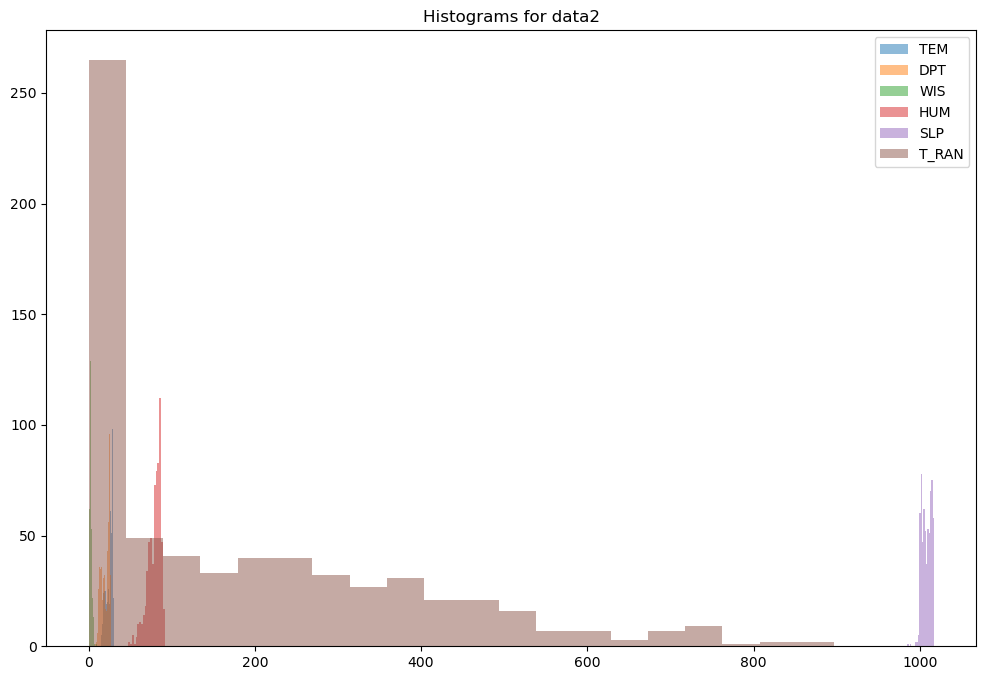

In [49]:
# Create histograms for visualizing of the selected columns data2
selected_variables = ['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'T_RAN']

plt.figure(figsize=(12, 8))
for column in selected_variables:
    plt.hist(data2[column], bins=20, alpha=0.5, label=column)
plt.title('Histograms for data2')
plt.legend()
plt.show()

### Chi-square Q-Q Plots
Chi-square Q-Q plots were constructed for each selected variable to assess their distributional properties. A Chi-square Q-Q plot provides insight into how well a variable follows a chi-square distribution. Deviations from a straight line indicate deviations from this distribution. Interpretations were made based on the curvature and trends in the Q-Q plots.

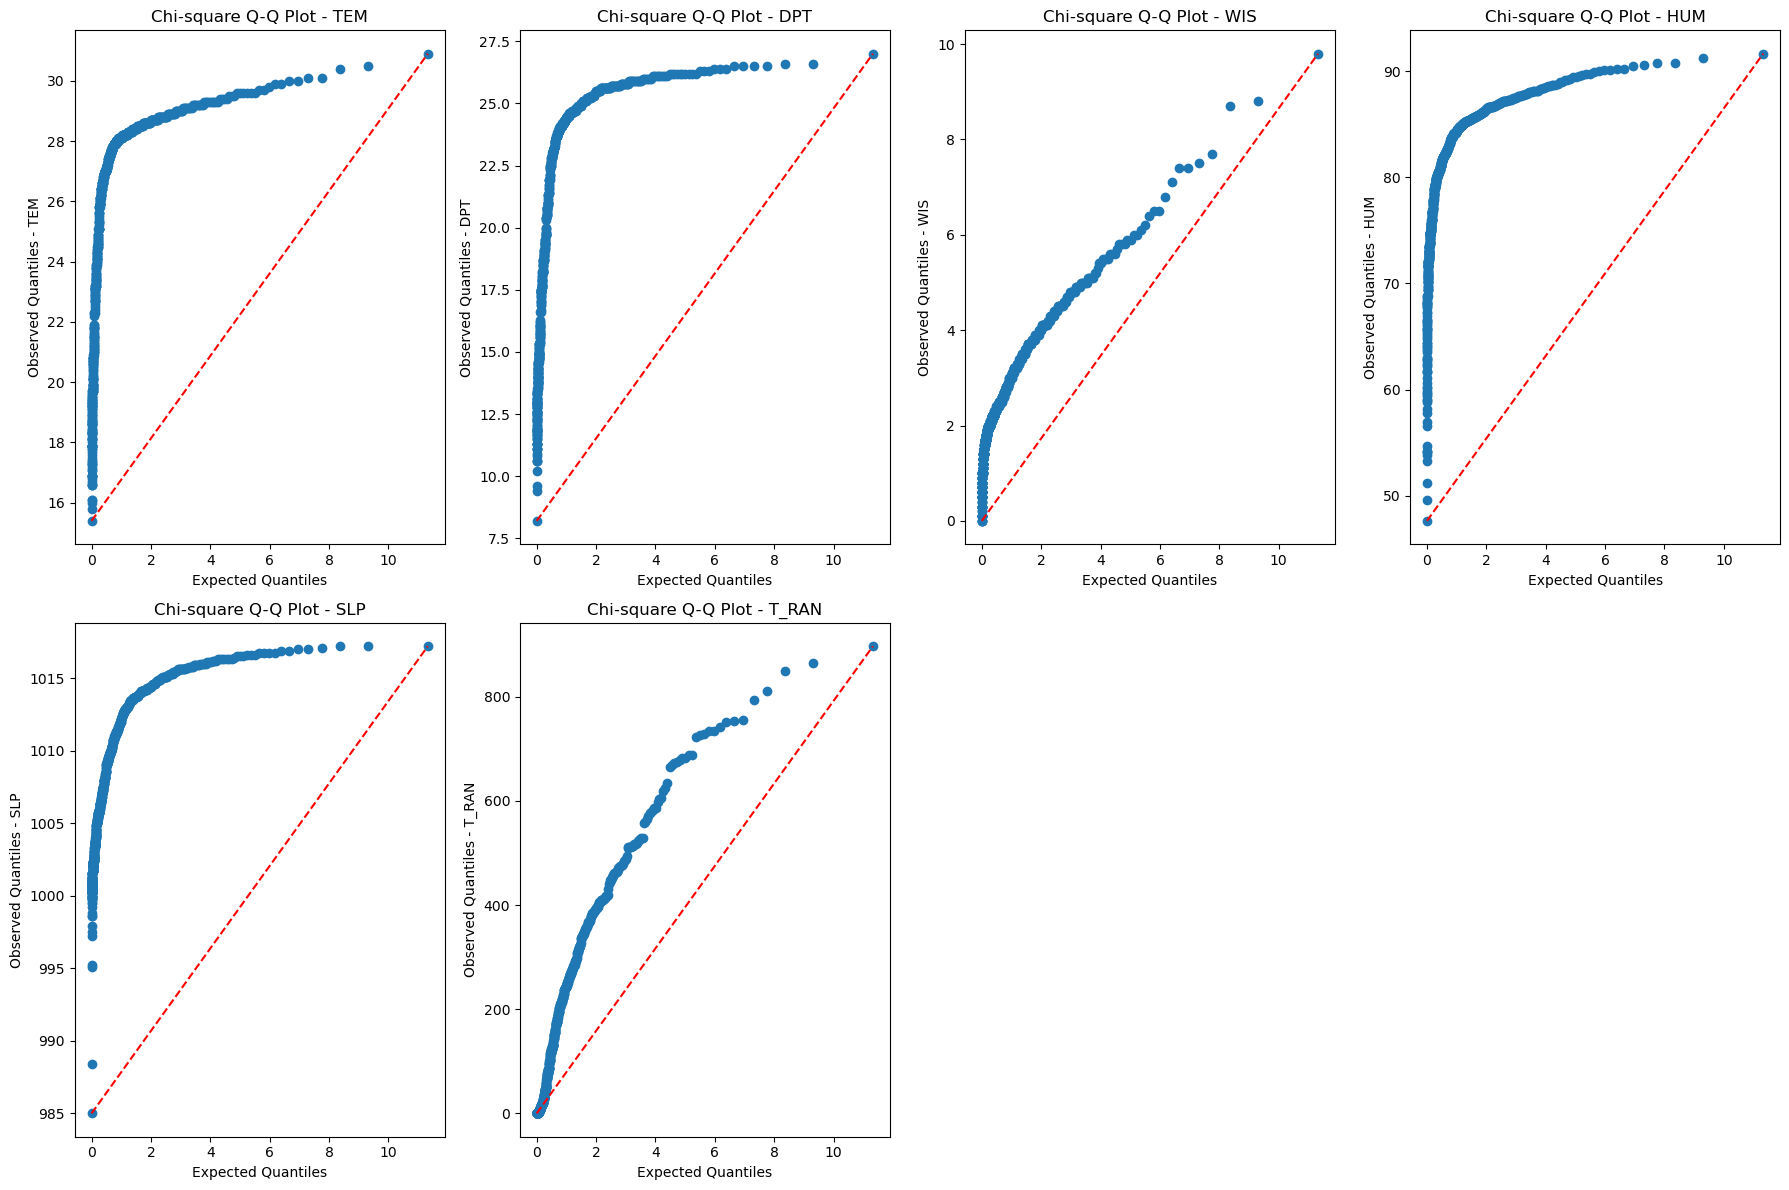

In [50]:
# creating a function for chi-square test
def chi_square_qq_plot(data, variable, ax):
    sorted_var = np.sort(data[variable])
    n = len(sorted_var)
    expected_quantiles = chi2.ppf((np.arange(1, n + 1) - 0.5) / n, 1)

    ax.scatter(expected_quantiles, sorted_var)
    ax.plot([expected_quantiles[0], expected_quantiles[-1]], [sorted_var[0], sorted_var[-1]], 'r--')
    ax.set_xlabel('Expected Quantiles')
    ax.set_ylabel(f'Observed Quantiles - {variable}')
    ax.set_title(f'Chi-square Q-Q Plot - {variable}')

# Create a 2x4 grid for Chi-square Q-Q plots
fig, axs = plt.subplots(2, 4, figsize=(18, 12))

# Create Chi-square Q-Q plots for each variable
for idx, column in enumerate(selected_variables):
    if data2[column].notnull().any():  # Check if there are valid values
        row_idx = idx // 4
        col_idx = idx % 4
        ax = axs[row_idx, col_idx]
        chi_square_qq_plot(data2, column, ax)

# Remove any empty subplots
for idx in range(len(selected_variables), 2 * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()


### Outlier Detection and Removal
Outliers were identified using the z-score method, which quantifies the number of standard deviations a data point is from the mean. Outliers can significantly affect statistical analyses and hence were removed to ensure robust results.

In [51]:
from scipy.stats import zscore

# Copy the original dataframe to a new dataframe for outlier removal
clean_data = data2.copy()

# Select only the selected variables for outlier removal
selected_numeric_columns = ['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'T_RAN']

# Calculate the z-scores for the selected variables
z_scores = clean_data[selected_numeric_columns].apply(zscore)

# Count the number of rows before removing outliers
num_rows_before = clean_data.shape[0]

# Remove rows with any z-score greater than 3 or less than -3
clean_data = clean_data[(np.abs(z_scores) < 3).all(axis=1)]

# Count the number of rows after removing outliers
num_rows_after = clean_data.shape[0]

# Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

# Print the number of rows removed
print(f"Number of rows removed: {num_rows_removed}")

# Print the summary statistics after removing outliers
print("Summary Statistics after removing outliers:")
print(clean_data.describe())


Number of rows removed: 23
Summary Statistics after removing outliers:
               ID         Year       Month         TEM         DPT  \
count  631.000000   631.000000  631.000000  631.000000  631.000000   
mean   345.225040  1988.221870    6.562599   25.227417   20.460222   
std    195.856062    16.322296    3.472632    3.891696    4.906040   
min      1.000000  1960.000000    1.000000   15.400000    9.600000   
25%    177.500000  1974.000000    4.000000   22.050000   15.700000   
50%    355.000000  1989.000000    7.000000   27.000000   22.400000   
75%    513.500000  2002.000000   10.000000   28.300000   24.750000   
max    672.000000  2015.000000   12.000000   30.500000   27.000000   

              WIS         HUM          SLP       T_RAN      A_RAIN  
count  631.000000  631.000000   631.000000  631.000000  631.000000  
mean     2.500000   79.447639  1008.320602  174.256735    5.695040  
std      1.339912    7.310824     5.387792  190.572689    6.215546  
min      0.000000   56

### Chi-square Q-Q Plots after Outlier Removal
Following outlier removal, Chi-square Q-Q plots were reconstructed to determine if outliers had a substantial impact on distributional properties. Any changes in the shape of the Q-Q plots were noted and explained.

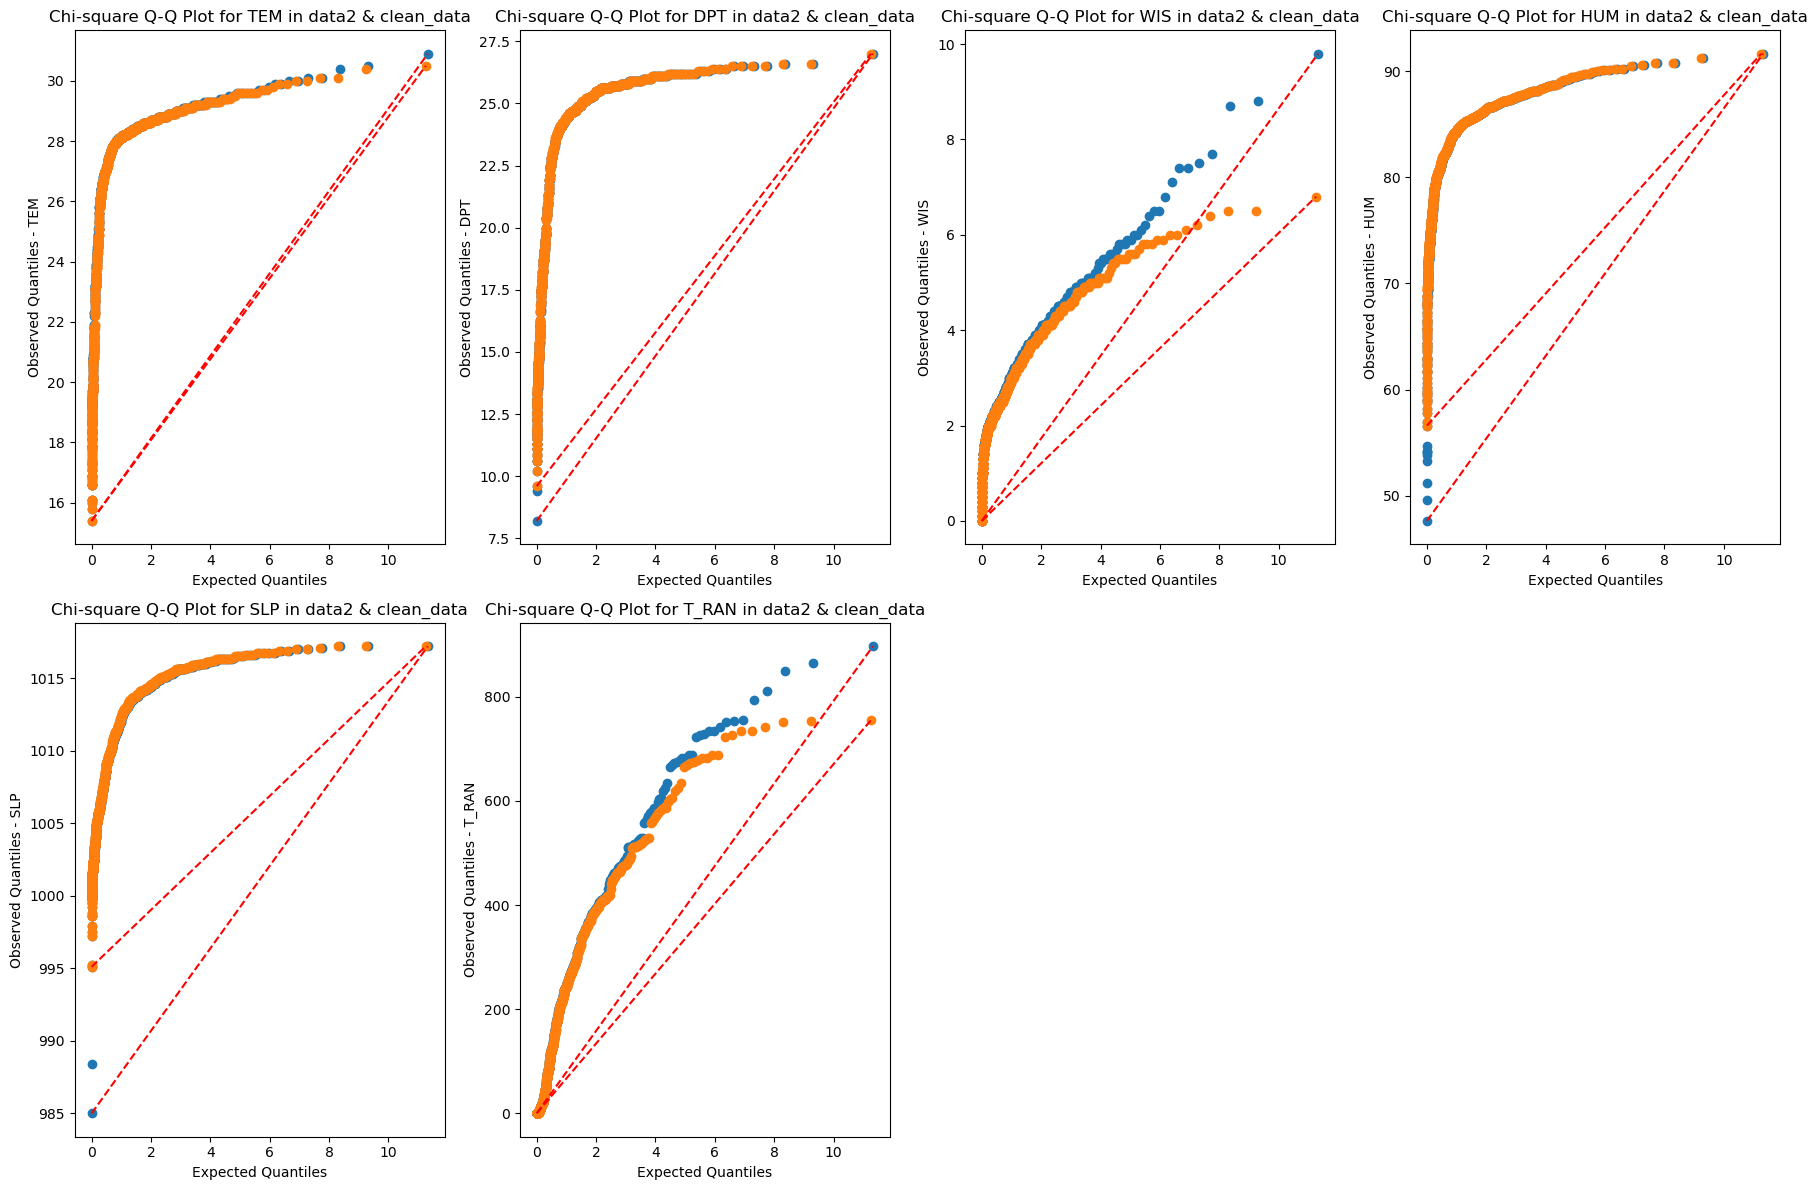

In [52]:
# Create a 2x4 grid for Chi-square Q-Q plots
fig, axs = plt.subplots(2, 4, figsize=(18, 12))

# Create Chi-square Q-Q plots for data2
for idx, column in enumerate(selected_variables):
    sorted_var_data2 = np.sort(data2[column])
    n_data2 = len(sorted_var_data2)
    expected_quantiles_data2 = chi2.ppf((np.arange(1, n_data2 + 1) - 0.5) / n_data2, 1)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axs[row_idx, col_idx]
    ax.scatter(expected_quantiles_data2, sorted_var_data2)
    ax.plot([expected_quantiles_data2[0], expected_quantiles_data2[-1]], [sorted_var_data2[0], sorted_var_data2[-1]], 'r--')
 #   ax.set_xlabel('Expected Quantiles')
  #  ax.set_ylabel(f'Observed Quantiles - {column}')
   # ax.set_title(f'Chi-square Q-Q Plot for {column} in data2')

    # Create Chi-square Q-Q plots for clean_data
    sorted_var_clean_data = np.sort(clean_data[column])
    n_clean_data = len(sorted_var_clean_data)
    expected_quantiles_clean_data = chi2.ppf((np.arange(1, n_clean_data + 1) - 0.5) / n_clean_data, 1)

    ax = axs[row_idx, col_idx]  # Use the same row_idx, col_idx for clean_data subplot
    ax.scatter(expected_quantiles_clean_data, sorted_var_clean_data)
    ax.plot([expected_quantiles_clean_data[0], expected_quantiles_clean_data[-1]], [sorted_var_clean_data[0], sorted_var_clean_data[-1]], 'r--')
    ax.set_xlabel('Expected Quantiles')
    ax.set_ylabel(f'Observed Quantiles - {column}')
    ax.set_title(f'Chi-square Q-Q Plot for {column} in data2 & clean_data')
# Remove any empty subplots
for idx in range(len(selected_variables), 2 * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()


##### Analyzing the correlation coeffecient

In [53]:
import numpy as np
from scipy.stats import probplot

# Calculate correlation coefficients for data2
correlations_data2 = {}
for column in selected_variables:
    _, observed_quantiles_data2 = probplot(data2[column], dist="norm", fit=False)
    r_value_data2 = np.corrcoef(observed_quantiles_data2, np.linspace(-3, 3, len(observed_quantiles_data2)))[0, 1]
    correlations_data2[column] = r_value_data2

# Calculate correlation coefficients for clean_data
correlations_clean_data = {}
for column in selected_variables:
    _, observed_quantiles_clean_data = probplot(clean_data[column], dist="norm", fit=False)
    r_value_clean_data = np.corrcoef(observed_quantiles_clean_data, np.linspace(-3, 3, len(observed_quantiles_clean_data)))[0, 1]
    correlations_clean_data[column] = r_value_clean_data

print("Correlation coefficients for data2:")
print(correlations_data2)

print("\nCorrelation coefficients for clean_data:")
print(correlations_clean_data)




Correlation coefficients for data2:
{'TEM': 0.942125176560396, 'DPT': 0.9712298163037155, 'WIS': 0.9416500474279328, 'HUM': 0.9392195139089491, 'SLP': 0.9892628806917599, 'T_RAN': 0.9199126270050281}

Correlation coefficients for clean_data:
{'TEM': 0.9439255381022941, 'DPT': 0.9719078836827094, 'WIS': 0.9662929432046592, 'HUM': 0.9578868461479758, 'SLP': 0.9966478282790517, 'T_RAN': 0.9288726536972484}


##### Analyzing the correlation coeffecient

In [54]:
# skewness and kurtosis
from scipy.stats import skew, kurtosis

# Select the numeric variables for skewness and kurtosis calculation
selected_numeric_columns = ['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'T_RAN']

# Calculate skewness and kurtosis for data2
skewness_data2 = data2[selected_numeric_columns].apply(skew)
kurtosis_data2 = data2[selected_numeric_columns].apply(kurtosis)

# Calculate skewness and kurtosis for cleaned_data
skewness_cleaned_data = clean_data[selected_numeric_columns].apply(skew)
kurtosis_cleaned_data = clean_data[selected_numeric_columns].apply(kurtosis)

# Display the results
print("Skewness for data2:")
print(skewness_data2)
print("\nSkewness for cleaned_data:")
print(skewness_cleaned_data)

print("\nKurtosis for data2:")
print(kurtosis_data2)
print("\nKurtosis for cleaned_data:")
print(kurtosis_cleaned_data) 


Skewness for data2:
TEM     -0.823571
DPT     -0.495735
WIS      1.007593
HUM     -1.085246
SLP     -0.222000
T_RAN    1.121221
dtype: float64

Skewness for cleaned_data:
TEM     -0.797032
DPT     -0.482641
WIS      0.608789
HUM     -0.842189
SLP     -0.079335
T_RAN    1.006730
dtype: float64

Kurtosis for data2:
TEM     -0.681323
DPT     -1.208549
WIS      1.743940
HUM      0.989361
SLP     -0.682485
T_RAN    0.587529
dtype: float64

Kurtosis for cleaned_data:
TEM     -0.750845
DPT     -1.239316
WIS      0.059501
HUM      0.113407
SLP     -1.279379
T_RAN    0.137927
dtype: float64


### Scatter Plot Analysis
A scatter plot was generated to visualize relationships between the selected climate variables (excluding outliers) and Total Rainfall (T_RAN). Scatter plots enable the identification of potential trends or patterns between variables, aiding in further analysis.

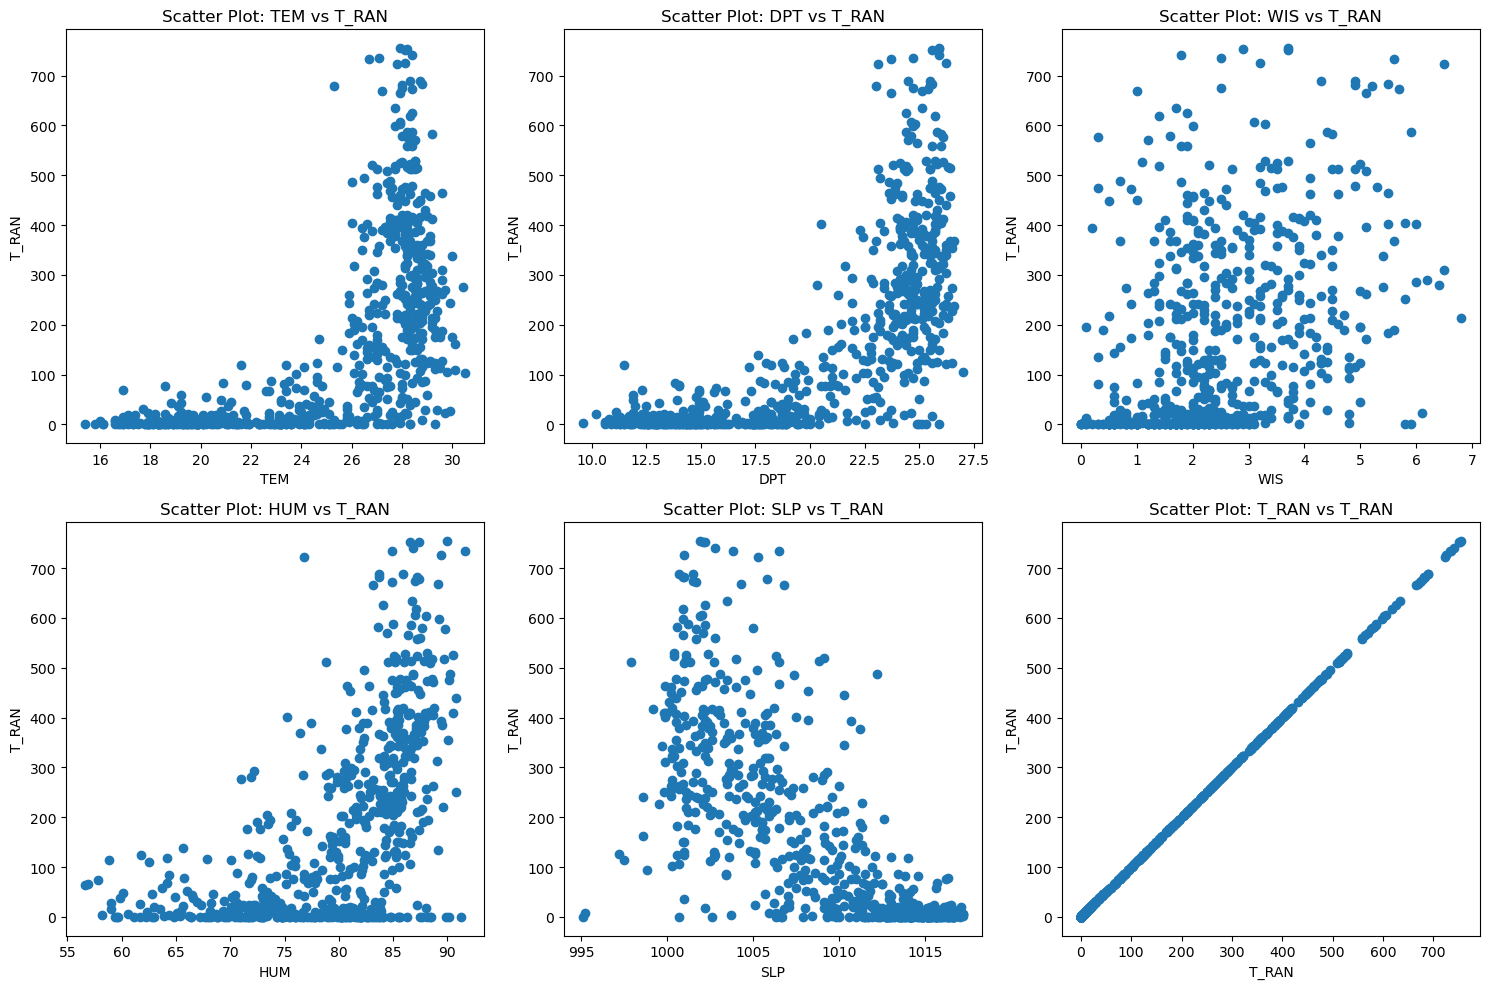

In [55]:
import matplotlib.pyplot as plt

# Select the numeric variables for the scatter plot
selected_numeric_columns = ['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'T_RAN']

# Create a 2x3 grid for scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create scatter plots for each pair of selected variables
for idx, column1 in enumerate(selected_numeric_columns):
    row_idx = idx // 3
    col_idx = idx % 3
    ax = axs[row_idx, col_idx]
    ax.scatter(clean_data[column1], clean_data['T_RAN'])
    ax.set_xlabel(column1)
    ax.set_ylabel('T_RAN')
    ax.set_title(f'Scatter Plot: {column1} vs T_RAN')

# Remove any empty subplots
for idx in range(len(selected_numeric_columns), 2 * 3):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()


In [56]:
mean_vector = clean_data[selected_numeric_columns].mean()
print("Mean Vector:")
print(mean_vector)

var_cov_matrix = clean_data[selected_numeric_columns].cov()
print("\nVariance-Covariance Matrix:")
print(var_cov_matrix)


Mean Vector:
TEM        25.227417
DPT        20.460222
WIS         2.500000
HUM        79.447639
SLP      1008.320602
T_RAN     174.256735
dtype: float64

Variance-Covariance Matrix:
              TEM         DPT        WIS         HUM         SLP         T_RAN
TEM     15.145295   17.450330   1.970476   10.381278  -17.657375    459.908823
DPT     17.450330   24.069225   2.009159   24.953187  -22.611195    672.967848
WIS      1.970476    2.009159   1.795365    0.154489   -2.765000     96.393651
HUM     10.381278   24.953187   0.154489   53.448154  -20.375689    811.677956
SLP    -17.657375  -22.611195  -2.765000  -20.375689   29.028305   -739.590853
T_RAN  459.908823  672.967848  96.393651  811.677956 -739.590853  36317.949855


### Principal Component Analysis (PCA)
PCA was conducted on the cleaned dataset after standardization. PCA reduces the dimensionality of data while preserving most of its variance. Principal components, eigenvalues, and explained variance ratios were computed. A scree plot was created to visualize the significance of each principal component. But first we need to standarize the numeric variables

In [59]:
clean_data.info(),clean_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 671
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       631 non-null    int64  
 1   Station  631 non-null    object 
 2   Year     631 non-null    int64  
 3   Month    631 non-null    int64  
 4   TEM      631 non-null    float64
 5   DPT      631 non-null    float64
 6   WIS      631 non-null    float64
 7   HUM      631 non-null    float64
 8   SLP      631 non-null    float64
 9   T_RAN    631 non-null    int64  
 10  A_RAIN   631 non-null    float64
 11  RAN      631 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 64.1+ KB


(None,
    ID     Station  Year  Month   TEM   DPT  WIS    HUM     SLP  T_RAN  A_RAIN  \
 0   1  Mymensingh  1960      1  16.9  11.3  2.0  73.39  1016.0     15    0.48   
 1   2  Mymensingh  1960      2  21.4  12.6  1.7  66.34  1013.0      0    0.00   
 2   3  Mymensingh  1960      3  24.1  14.9  2.3  64.13  1011.4     69    2.23   
 3   4  Mymensingh  1960      4  29.9  17.6  2.2  59.03  1007.1     27    0.90   
 4   5  Mymensingh  1960      5  29.6  23.2  2.4  73.45  1003.4    187    6.03   
 
    RAN  
 0  NRT  
 1  NRT  
 2  LTR  
 3  NRT  
 4  LTR  )

In [71]:
from sklearn.preprocessing import StandardScaler

# Select only numeric climate variables
numeric_columns = ['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'T_RAN', 'A_RAIN']
numeric_data = clean_data[selected_numeric_columns]

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[-2.14148897, -1.86861292, -0.37345478, -0.82924223,  1.42646372,
        -0.83633746],
       [-0.98426332, -1.60342319, -0.59752765, -1.79433079,  0.86920763,
        -0.91511003],
       [-0.28992792, -1.13424135, -0.14938191, -2.0968621 ,  0.57200439,
        -0.55275622],
       ...,
       [ 0.45583972,  0.62009073, -0.37345478,  0.41510599,  0.55342918,
         0.03016078],
       [-0.54708918, -0.35907136, -0.59752765,  0.31243699,  0.99923405,
        -0.84684047],
       [-1.78146321, -1.13424135, -0.52283669,  0.44248439,  1.40788851,
        -0.88885251]])

In [76]:
from sklearn.decomposition import PCA
# Initialize the PCA object
pca = PCA()

# Fit the PCA model to the standardized data and transform it to get the principal components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to store the principal components with appropriate column names
#principal_components_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(len(numeric_columns))])
#principal_components_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(len(numeric_columns))])
principal_components_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])


print("\nPrincipal Components:")
print(principal_components_df)


Principal Components:
          PC1       PC2       PC3       PC4       PC5       PC6
0    3.250927  0.059117 -0.921990  0.336812  0.307362 -0.095168
1    2.757059  0.596730  0.508846  0.653662  0.249354  0.059285
2    1.927463  1.172032  0.850964  0.780504  0.004040  0.017949
3    0.968976  1.702484  2.418827  0.742974 -0.021541  0.235473
4   -0.932470  0.546411  1.351831  0.281591  0.139502 -0.045449
..        ...       ...       ...       ...       ...       ...
626 -2.148137 -0.598037  0.033550 -0.013451 -0.052229 -0.037603
627 -1.482167 -0.763663  0.341393 -0.159731 -0.331788  0.074072
628 -0.316629 -0.576770  0.186766 -0.280199 -0.813922 -0.049965
629  1.273674 -0.715577 -0.154670 -0.569921 -0.333345  0.065987
630  2.349151 -0.828659 -1.146952 -0.423315  0.029470 -0.026923

[631 rows x 6 columns]


In [67]:
######********** This is PCA Analysis without standariation that generates error*********#########


#from sklearn.decomposition import PCA

# Initialize the PCA object
#pca = PCA()

# Fit the PCA model to the data and transform it to get the principal components
#principal_components = pca.fit_transform(clean_data[numeric_columns])

# Create a DataFrame to store the principal components with appropriate column names
#principal_components_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(len(numeric_columns))])

#print("\nPrincipal Components:")
#print(principal_components_df)



Principal Components:
            PC1        PC2        PC3       PC4       PC5       PC6       PC7
0   -159.796746   7.257161  -6.833721  2.106281  0.258816 -0.452778 -0.058577
1   -174.809967  10.243852   1.505184  1.465062 -0.821696  0.264161  0.067069
2   -105.761570  12.533132   4.917887  0.142875 -0.721940  0.091054  0.046547
3   -147.655930  11.722549  14.574499 -0.532620 -1.541608  1.097218  0.200683
4     12.810300   1.922956   8.972207  0.213936 -0.965752 -0.202359  0.037481
..          ...        ...        ...       ...       ...       ...       ...
626  175.130776  -4.862286   0.441664 -0.393975 -0.344421 -0.194777  0.094274
627   89.050206  -5.440013   0.505057 -1.903641 -0.582986  0.377075 -0.119176
628    5.824425  -3.044499  -1.287377 -4.332389 -0.189732 -0.216052  0.011074
629 -161.347869  -4.767697  -3.816633 -1.823447  0.135001  0.295545  0.059826
630 -169.501174  -2.632800  -9.358534  0.438367  0.627835 -0.146476 -0.007214

[631 rows x 7 columns]


Scree plot is a graphic that shows the explained variance per newly defined component (principal component).

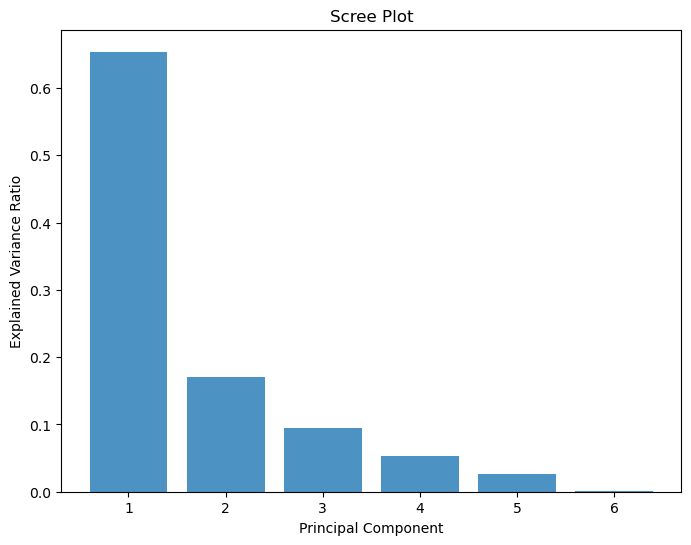

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the explained variance ratio from the PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


A biplot graph is a type of scatterplot that shows both the samples and the variables of a data matrix on the same graph1. The blue dots represent the samples, and the red lines represent the variables. The axes are the principal components, which are linear combinations of the original variables that capture most of the variation in the data set. The closer two dots are, the more similar they are in terms of their variables. The closer a dot is to a red line, the more it is influenced by that variable. For example, the point “TEM” is close to the red line for “WAS”, which means it has a high value for that variable. The point “SLP” is far from the red line for “HUM”, which means it has a low value for that variable. The angle between two red lines indicates how correlated the variables are. The smaller the angle, the more positively correlated they are. For example, the angle between “JTM” and “WAS” is small, which means they are positively correlated. The angle between “HUM” and “SLP” is large, which means they are negatively correlated.

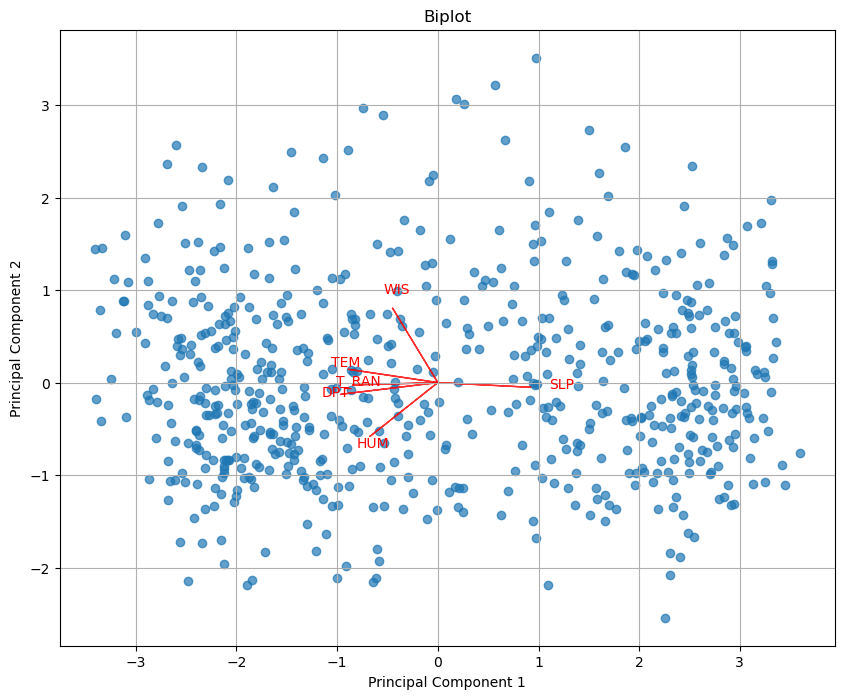

In [79]:
# Get the loadings or coefficients for each variable in each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the biplot
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)

# Plot the arrows for the original variables
for i, variable in enumerate(selected_numeric_columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.8)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, variable, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot')
plt.grid()
plt.show()


In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats,probplot

In [86]:
# Fit the regression model
model = ols('T_RAN ~ TEM + DPT + WIS + HUM + SLP', data=clean_data).fit()

# Get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                sum_sq     df          F        PR(>F)
TEM       2.349950e+03    1.0   0.165217  6.845369e-01
DPT       1.387098e+04    1.0   0.975224  3.237630e-01
WIS       6.057159e+05    1.0  42.585921  1.399041e-10
HUM       9.511322e+04    1.0   6.687102  9.936378e-03
SLP       8.187586e+05    1.0  57.564264  1.191922e-13
Residual  8.889614e+06  625.0        NaN           NaN


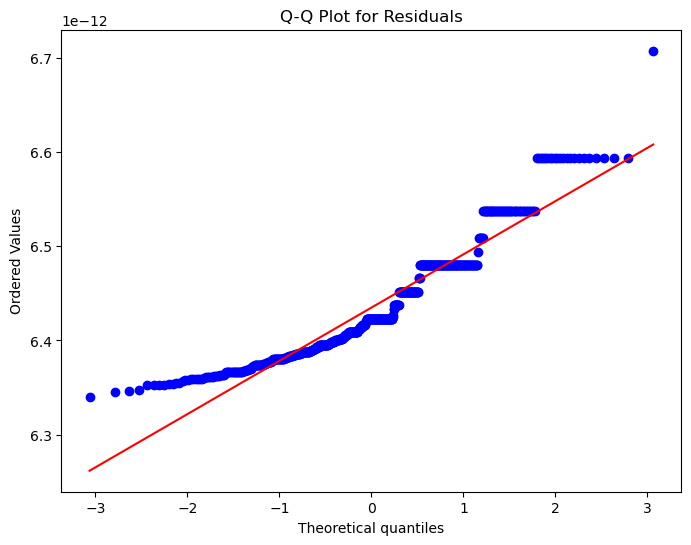

In [93]:
import scipy
# Get the residuals from the model
residuals = model.resid

# Create the Q-Q plot for the residuals
plt.figure(figsize=(8, 6))
scipy.stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

# problem 2
Apply Single linkage, Complete linkage, Average linkage, Ward's linkage, and k-means clustering algorithm to cluster the locations based on maximum temperature and minimum temperature separately. You should apply the algorithm to find the optimal number of clusters for k-means clustering. Compare and comment on your results.

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt

In [2]:
# Sample data (Please replace this with your actual data)
max_temp = pd.read_excel('G:\\ASDS\\New folder\\Multivariant_habibur\\assssss\\MAX TEM.xlsx',sheet_name='MAX TEM')
min_temp = pd.read_excel('G:\\ASDS\\New folder\\Multivariant_habibur\\assssss\\MIN TEM.xlsx',sheet_name='MIN TEM')
max_temp.info(), max_temp.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  34 non-null     object 
 1   Jan      34 non-null     float64
 2   Feb      34 non-null     float64
 3   Mar      34 non-null     float64
 4   Apr      34 non-null     float64
 5   May      34 non-null     float64
 6   Jun      34 non-null     float64
 7   Jul      34 non-null     float64
 8   Aug      34 non-null     float64
 9   Sep      34 non-null     float64
 10  Oct      34 non-null     float64
 11  Nov      34 non-null     float64
 12  Dec      34 non-null     float64
 13  Period   34 non-null     object 
dtypes: float64(12), object(2)
memory usage: 3.8+ KB


(None,
         Station   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
 0       Barisal  25.5  28.5  32.4  33.5  33.4  32.0  31.2  31.4  31.7  31.7   
 1         Bhola  25.6  28.5  31.9  33.0  32.9  31.7  30.8  31.2  31.4  31.7   
 2         Bogra  24.4  27.5  31.4  33.5  33.3  32.8  32.1  32.5  32.2  31.9   
 3      Chandpur  24.6  27.9  31.7  33.1  33.2  32.2  31.5  31.8  31.8  31.6   
 4    Chittagong  26.0  28.3  30.8  31.9  32.4  31.7  31.0  31.4  31.8  31.7   
 5     Chuadanga  24.4  28.5  33.4  36.1  35.8  34.1  32.8  33.1  32.9  32.2   
 6       Comilla  25.2  27.8  30.9  32.4  32.7  31.9  31.3  31.9  31.9  31.6   
 7   Cox's Bazar  27.1  29.1  31.5  32.7  32.8  31.2  30.5  30.8  31.5  32.0   
 8         Dhaka  25.1  28.3  32.5  33.8  33.4  32.5  31.8  32.1  32.0  31.8   
 9      Dinajpur  23.0  26.5  30.9  32.9  32.6  32.6  31.9  32.3  31.7  31.0   
 10     Faridpur  24.5  28.0  32.5  34.4  33.7  32.5  31.6  31.8  31.8  31.6   
 11         Feni  25.7  28.3  31.

In [3]:
max_temp.info(),min_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  34 non-null     object 
 1   Jan      34 non-null     float64
 2   Feb      34 non-null     float64
 3   Mar      34 non-null     float64
 4   Apr      34 non-null     float64
 5   May      34 non-null     float64
 6   Jun      34 non-null     float64
 7   Jul      34 non-null     float64
 8   Aug      34 non-null     float64
 9   Sep      34 non-null     float64
 10  Oct      34 non-null     float64
 11  Nov      34 non-null     float64
 12  Dec      34 non-null     float64
 13  Period   34 non-null     object 
dtypes: float64(12), object(2)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  34 non-null     object 
 1   Jan      34 no

(None, None)

In [4]:
# Extracting location names
location_names = max_temp['Station']

# Dropping the column for clustering
data_max_temp = max_temp.drop(columns=['Station','Period'])
data_min_temp = min_temp.drop(columns=['Station','Peroid'])

# Convert data to numpy arrays
data_max_temp = data_max_temp.to_numpy()
data_min_temp = data_min_temp.to_numpy()

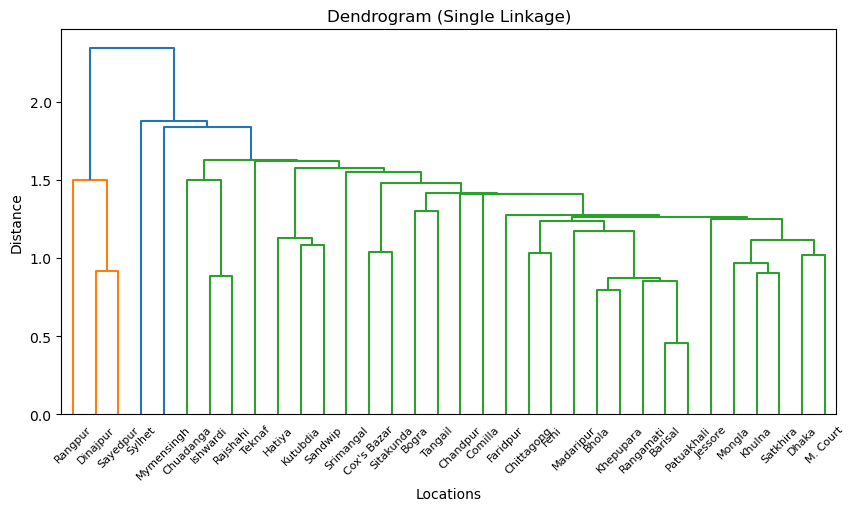

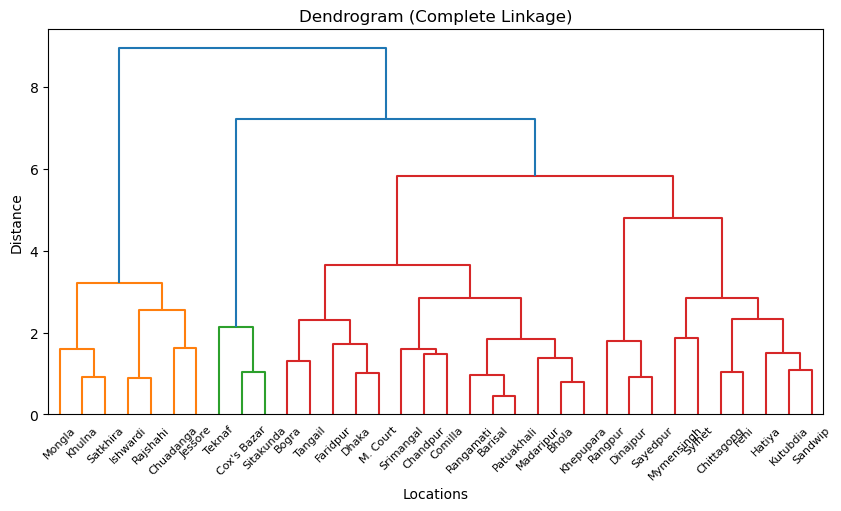

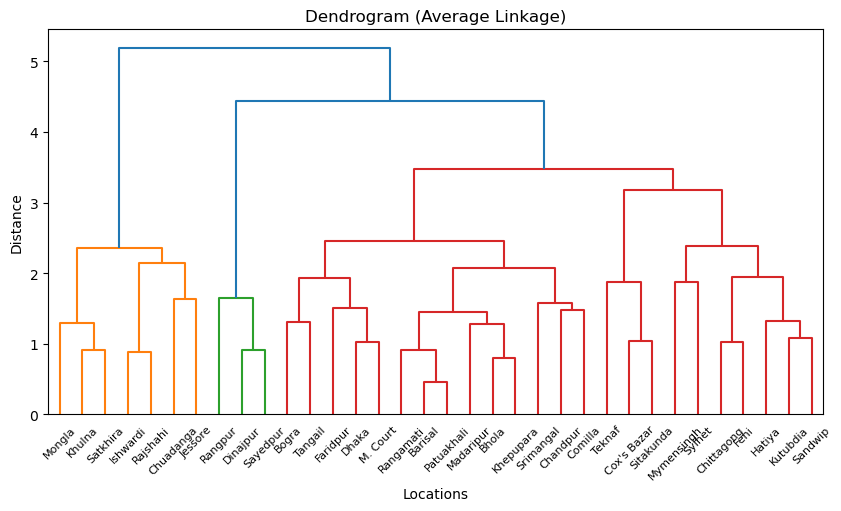

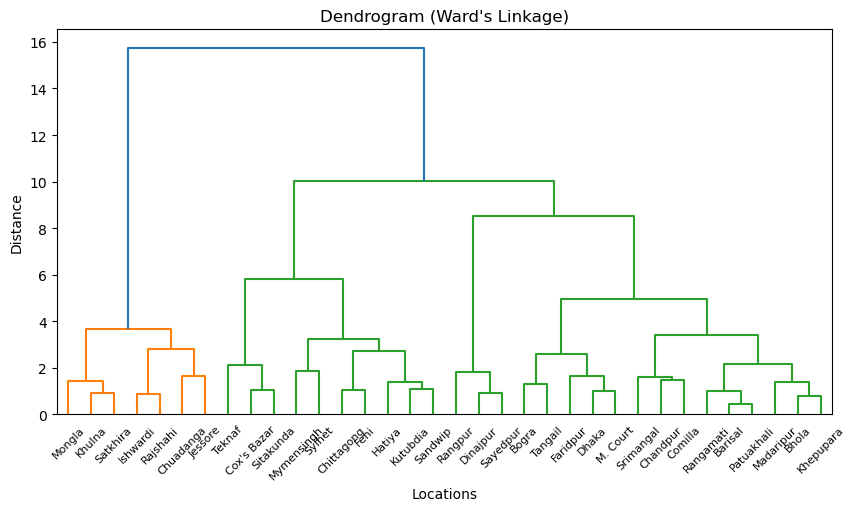

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Helper function to plot dendrogram
def plot_dendrogram(Z, names, method_name):
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=names)
    plt.xlabel('Locations')
    plt.ylabel('Distance')
    plt.title(f'Dendrogram ({method_name} Linkage)')
    plt.show()

# Single linkage
Z_single = linkage(data_max_temp, method='single')
plot_dendrogram(Z_single, location_names.values, method_name='Single')

# Complete linkage
Z_complete = linkage(data_max_temp, method='complete')
plot_dendrogram(Z_complete, location_names.values, method_name='Complete')

# Average linkage
Z_average = linkage(data_max_temp, method='average')
plot_dendrogram(Z_average, location_names.values, method_name='Average')

# Ward's linkage
Z_ward = linkage(data_max_temp, method='ward')
plot_dendrogram(Z_ward, location_names.values, method_name="Ward's")

In [7]:
location_names2 = min_temp['Station']


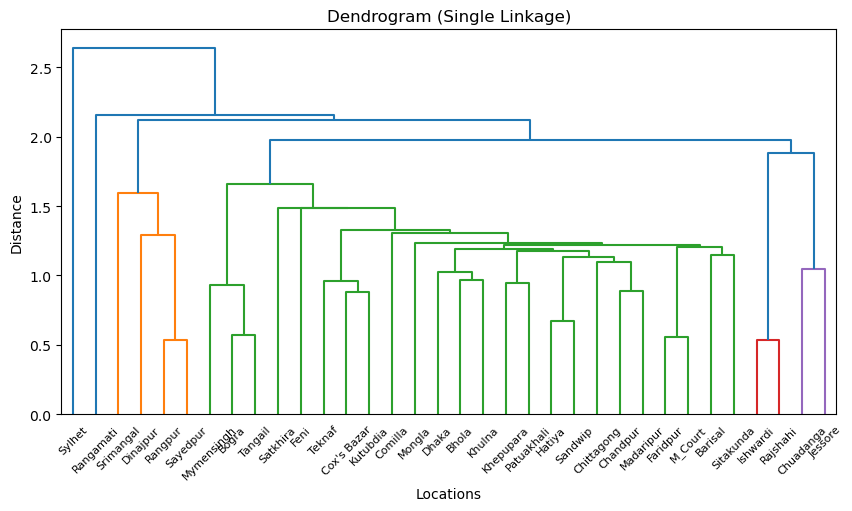

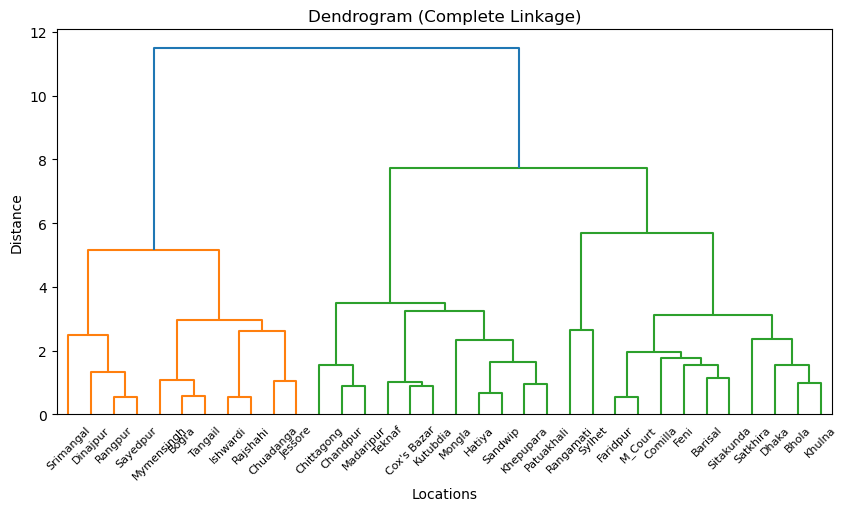

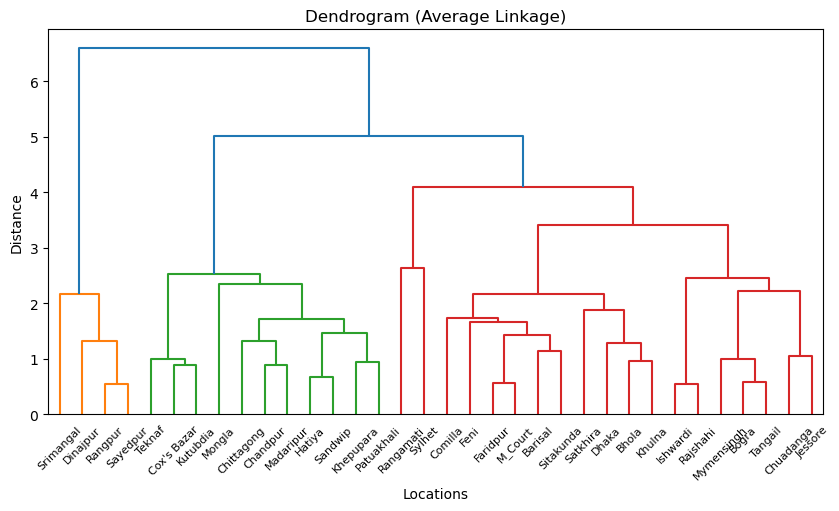

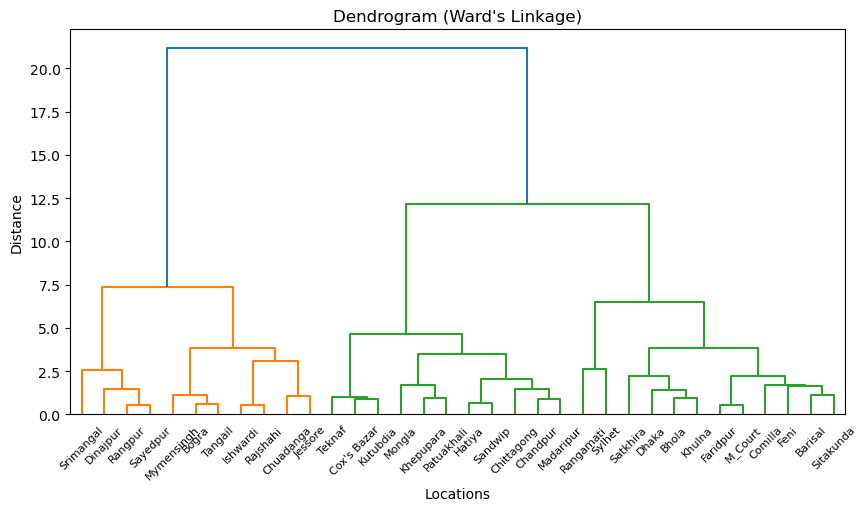

In [8]:

# Single linkage
Z_single = linkage(data_min_temp, method='single')
plot_dendrogram(Z_single, location_names2.values, method_name='Single')

# Complete linkage
Z_complete = linkage(data_min_temp, method='complete')
plot_dendrogram(Z_complete, location_names2.values, method_name='Complete')

# Average linkage
Z_average = linkage(data_min_temp, method='average')
plot_dendrogram(Z_average, location_names2.values, method_name='Average')

# Ward's linkage
Z_ward = linkage(data_min_temp, method='ward')
plot_dendrogram(Z_ward, location_names2.values, method_name="Ward's")

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

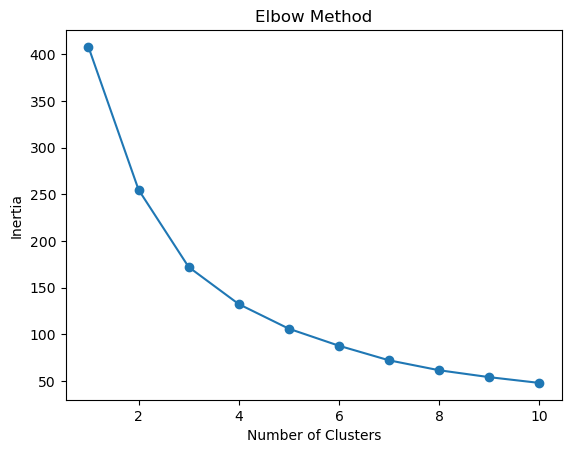

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

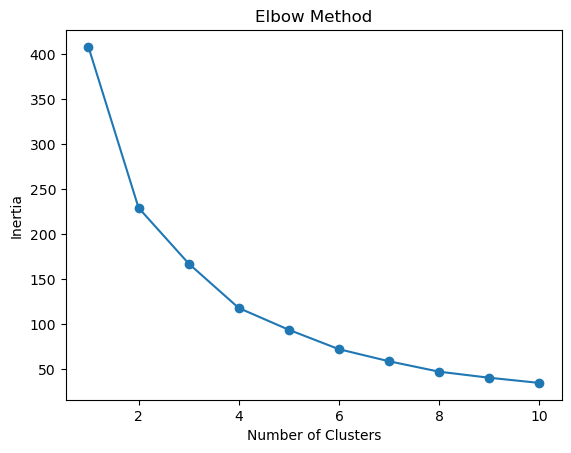

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize the data (optional but recommended)
scaler_max = StandardScaler()
data_max_temp_scaled = scaler_max.fit_transform(data_max_temp)

scaler_min = StandardScaler()
data_min_temp_scaled = scaler_min.fit_transform(data_min_temp)

# Determine optimal number of clusters using the elbow method
def find_optimal_clusters(data):
    inertia = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Find optimal clusters for max temperature
find_optimal_clusters(data_max_temp_scaled)
# Find optimal clusters for min temperature
find_optimal_clusters(data_min_temp_scaled)

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

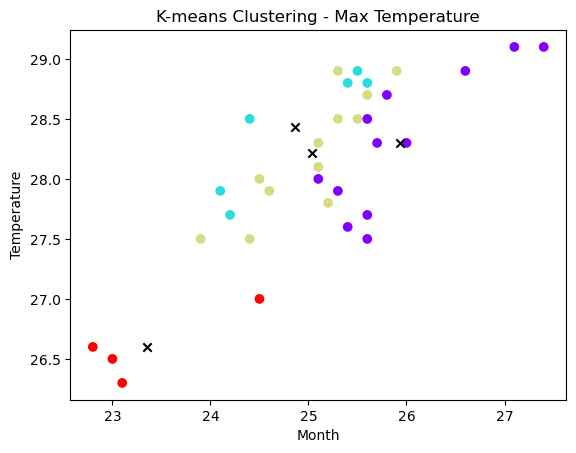

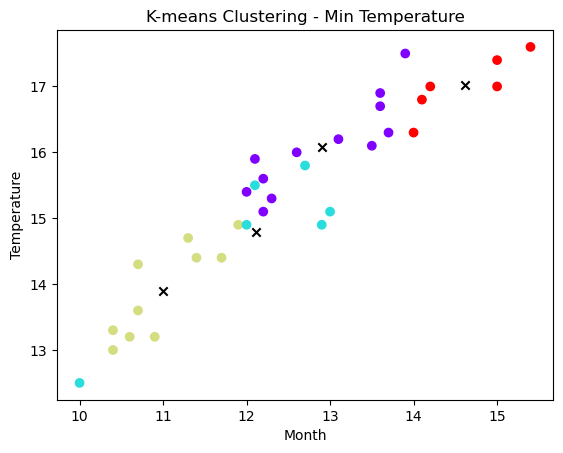

In [13]:
def perform_kmeans(data, n_clusters, scaler):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)
    # Transform cluster centers back to original scale
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    return clusters, cluster_centers

# Choose optimal clusters based on elbow method
optimal_clusters_max =4
optimal_clusters_min =4

# Perform k-means clustering for max temperature
clusters_max, cluster_centers_max = perform_kmeans(data_max_temp_scaled, optimal_clusters_max, scaler_max)

# Perform k-means clustering for min temperature
clusters_min, cluster_centers_min = perform_kmeans(data_min_temp_scaled, optimal_clusters_min, scaler_min)



#month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Visualize the clusters (you can customize this based on your needs)
plt.scatter(data_max_temp[:, 0], data_max_temp[:, 1], c=clusters_max, cmap='rainbow')
plt.scatter(cluster_centers_max[:, 0], cluster_centers_max[:, 1], c='black', marker='x')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('K-means Clustering - Max Temperature')
plt.show()

plt.scatter(data_min_temp[:, 0], data_min_temp[:, 1], c=clusters_min, cmap='rainbow')
plt.scatter(cluster_centers_min[:, 0], cluster_centers_min[:, 1], c='black', marker='x')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('K-means Clustering - Min Temperature')
plt.show()


ValueError: x and y must be the same size

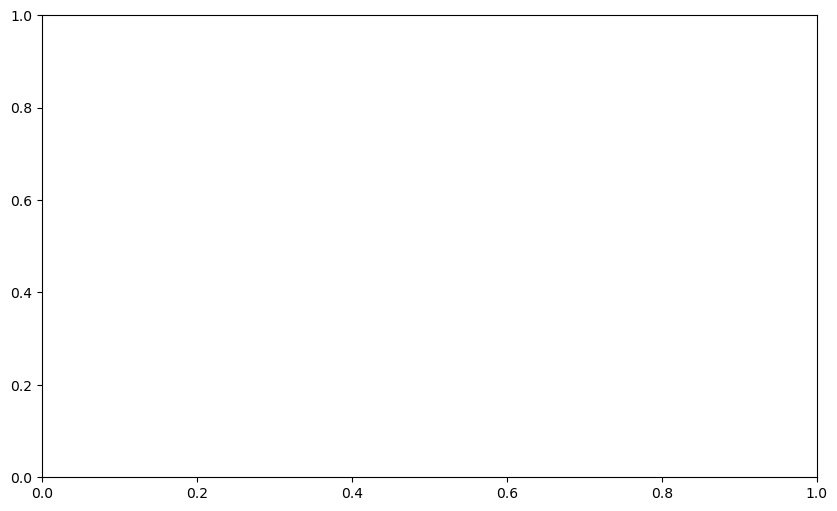

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

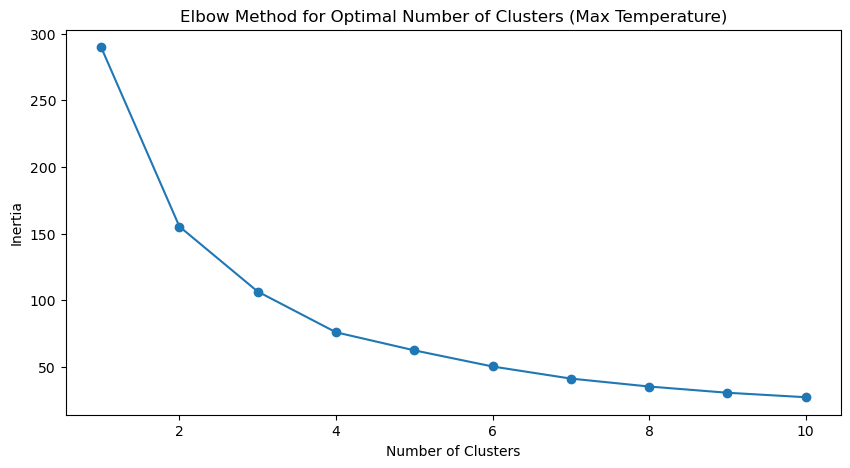

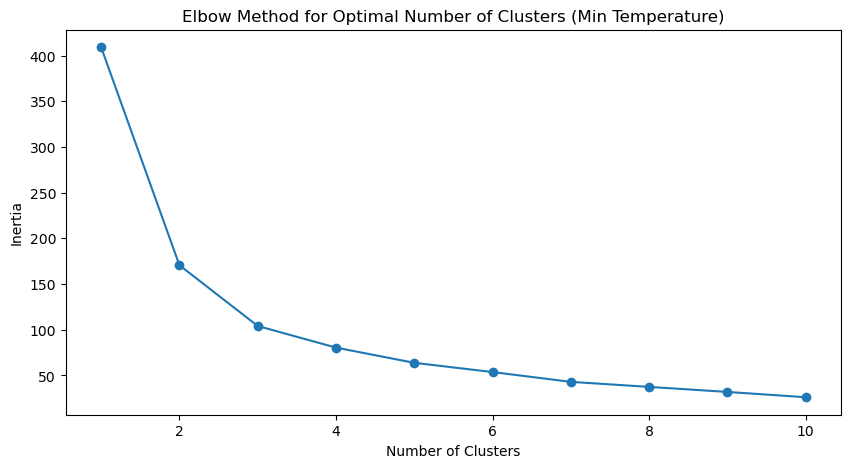

In [16]:
# Drop the 'Station' and 'Period' columns for clustering
data_max_temp = max_temp.drop(columns=['Station', 'Period'])
data_min_temp = min_temp.drop(columns=['Station', 'Peroid'])

# Convert data to numpy arrays
data_max_temp = data_max_temp.to_numpy()
data_min_temp = data_min_temp.to_numpy()

# Initialize lists to store inertia values (Sum of squared distances) for max and min temperature
inertia_max = []
inertia_min = []

# Try different numbers of clusters and calculate inertia
for n_clusters in range(1, 11):
    kmeans_max = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_min = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans_max.fit(data_max_temp)
    kmeans_min.fit(data_min_temp)
    inertia_max.append(kmeans_max.inertia_)
    inertia_min.append(kmeans_min.inertia_)

# Plot the elbow curves for max temperature
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia_max, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Max Temperature)')
plt.show()

# Plot the elbow curves for min temperature
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia_min, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Min Temperature)')
plt.show()

D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda\anaconda download\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

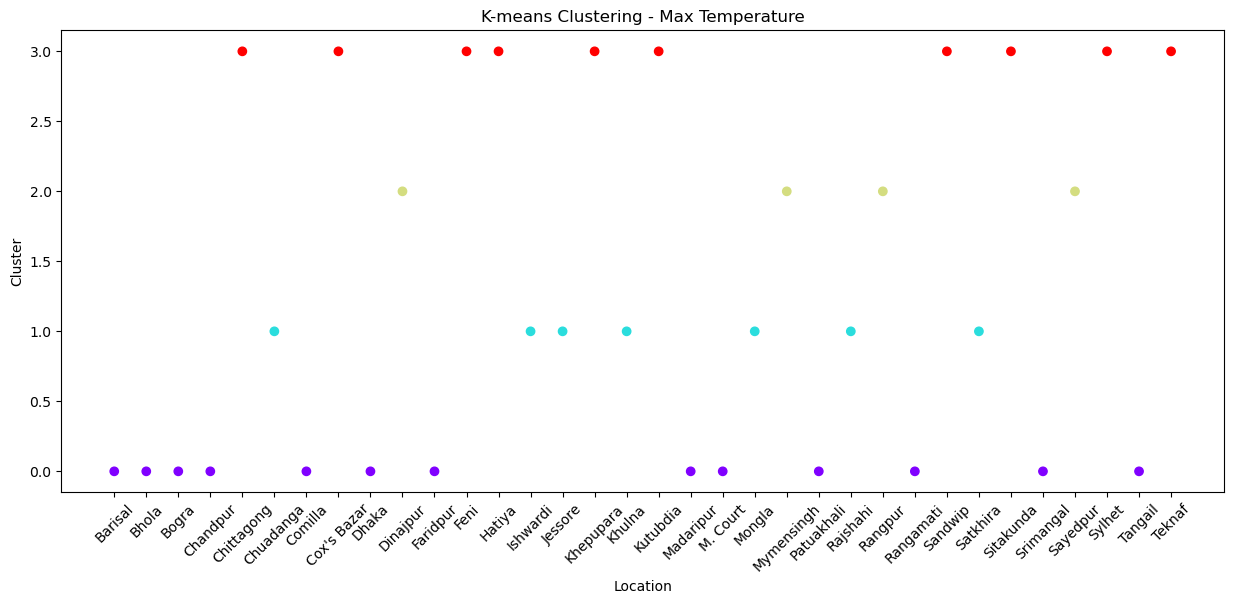

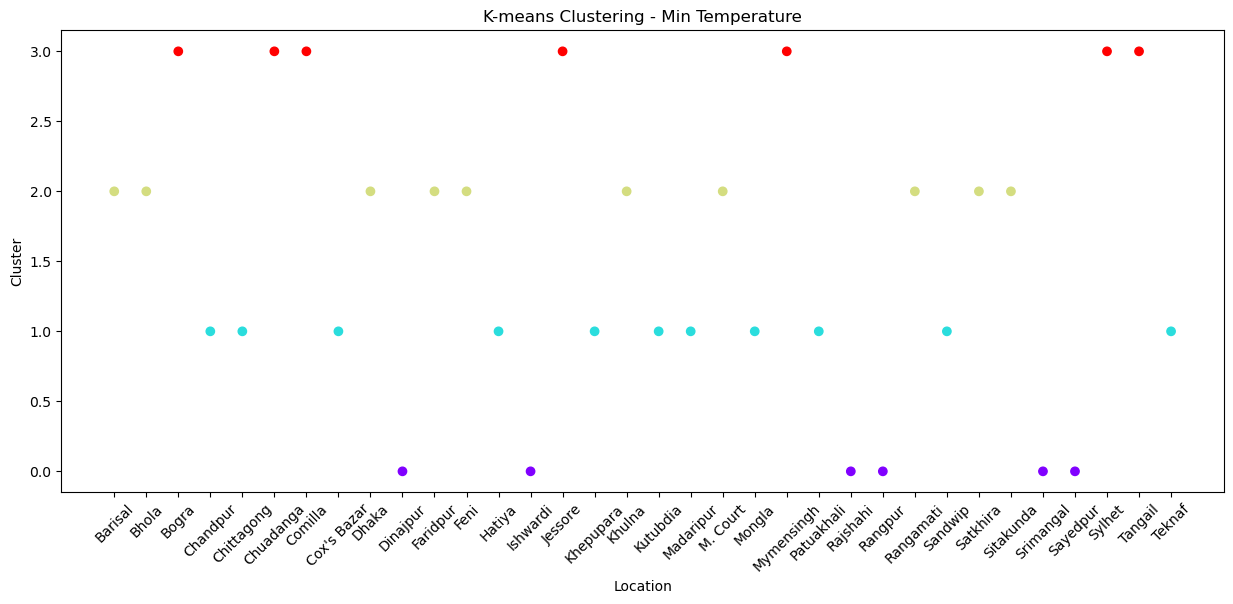

In [14]:
optimal_clusters_max = 4  
optimal_clusters_min = 4  
kmeans_max = KMeans(n_clusters=optimal_clusters_max, random_state=0)
kmeans_min = KMeans(n_clusters=optimal_clusters_min, random_state=0)

# Fit KMeans to the data
clusters_max = kmeans_max.fit_predict(data_max_temp)
clusters_min = kmeans_min.fit_predict(data_min_temp)

# Get location names
location_names = max_temp['Station']

# Plot the clustering for max temperature
plt.figure(figsize=(15, 6))
plt.scatter(location_names, clusters_max, c=clusters_max, cmap='rainbow')
plt.title('K-means Clustering - Max Temperature')
plt.xlabel('Location')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.show()

# Plot the clustering for min temperature
plt.figure(figsize=(15, 6))
plt.scatter(location_names, clusters_min, c=clusters_min, cmap='rainbow')
plt.title('K-means Clustering - Min Temperature')
plt.xlabel('Location')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.show()

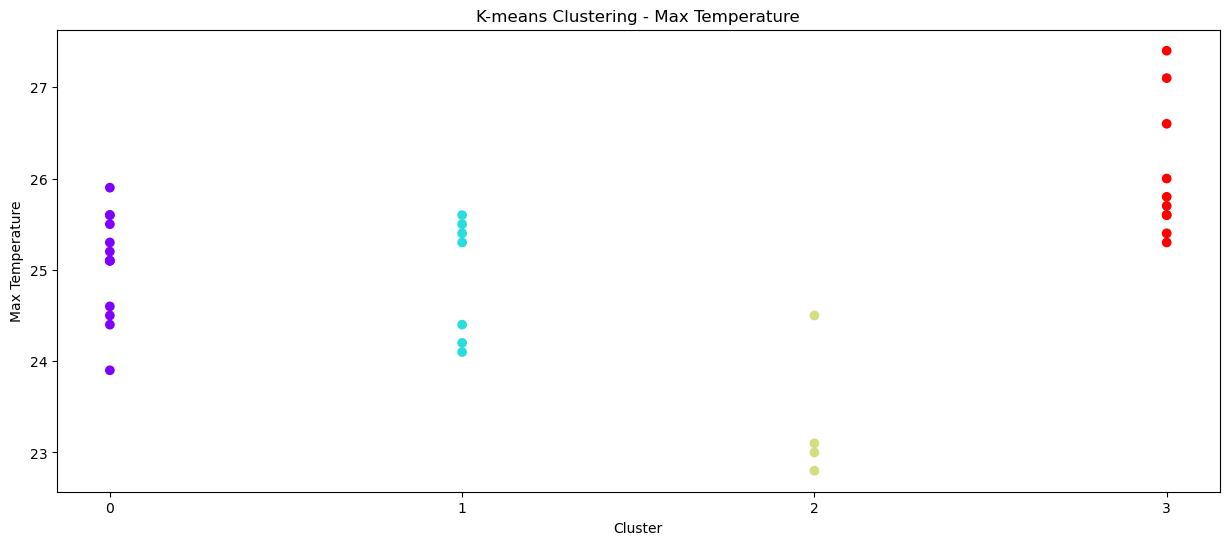

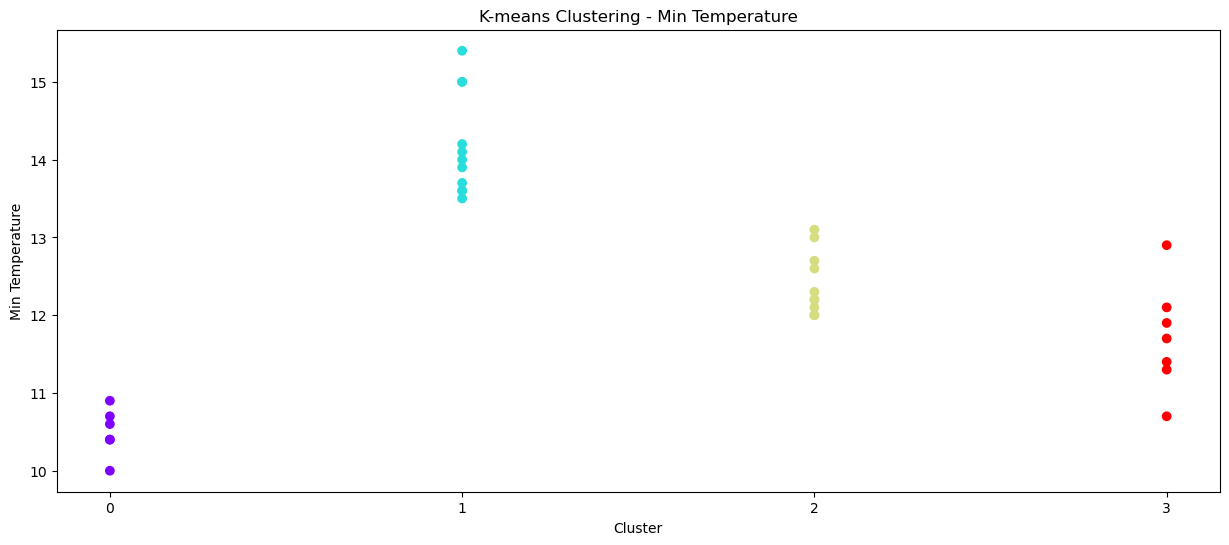

In [15]:
# Get location names
location_names = max_temp['Station']

# Plot the clustering for max temperature
plt.figure(figsize=(15, 6))
plt.scatter(clusters_max, data_max_temp[:, 0], c=clusters_max, cmap='rainbow')
plt.title('K-means Clustering - Max Temperature')
plt.xlabel('Cluster')
plt.ylabel('Max Temperature')
plt.xticks(np.arange(optimal_clusters_max))
plt.show()

# Plot the clustering for min temperature
plt.figure(figsize=(15, 6))
plt.scatter(clusters_min, data_min_temp[:, 0], c=clusters_min, cmap='rainbow')
plt.title('K-means Clustering - Min Temperature')
plt.xlabel('Cluster')
plt.ylabel('Min Temperature')
plt.xticks(np.arange(optimal_clusters_min))
plt.show()






In [ ]:
# end

In [ ]:
data.info()